Solution for the Task 2: 
Task 2 find negative values

Given a list of integer numbers, look for a negative number in the list. Consider an appropriate number of qubits and explain why your proposal is valid for all kinds of numbers in case 


def find_negative_numbers(list[int] ,list_number):
     “””
list_number : integer list!.
Return the True or False depends of the input


     # use a framework that works with quantum circuits, qiskit, cirq, pennylane, etc. 

      # consider print your quantum circuit,


SOLUTION -:

We divided the solutions into two functions:

1. find_the_largest_number(a,b)

We represent $$ a = a_na_(n-1)a_(n-2)....a_2a_1a_0 $$ and $$ b = b_nb_(n-1)b_(n-2)....b_2b_1b_0 $$
for a < b;
$$ First Output =  O_1 = (a_1<b_1)\oplus(a_1=b_1).(a_2<b_2)\oplus(a_1a_2=b_1b_2)(a_3<b_3)\oplus(a_1a_2a_3=b_1b_2b_3)(a_4<b_4)\oplus........\oplus(a_1...a_(n-1)=b_1....b_(n-1))(a_n<b_n) $$

and $$ Second Output = O_2 = (a_1a_2a_3...a_(n)=b_1b_2b_3....b_(n)) $$

   For comparing integers of bit length $n$, we require $3n$ qubits. 

   Here $q_0,q_3,q_6....q_(3n-3)$ corresponds to the Binary representation of the first parameter.
     
   $q_1,q_4,q_7....q_(3n-2)$ corresponds to the Binary representation of the Second parameter.
   $q_2$ and $q_(3n-1)$ corresponds to $O_1$ and $O_2$.

   $$If  (O_1 == 1):$$ 
        $$a < b$$. 
   $$elif (O_1 == 0) V (O_2 == 1): $$
        $$a = b$$
   $$else:$$
         $$a > b $$
         
2. find_negative_numbers(x)



Circuit design for Three Bit Circuit (comparing 6 and 7) 


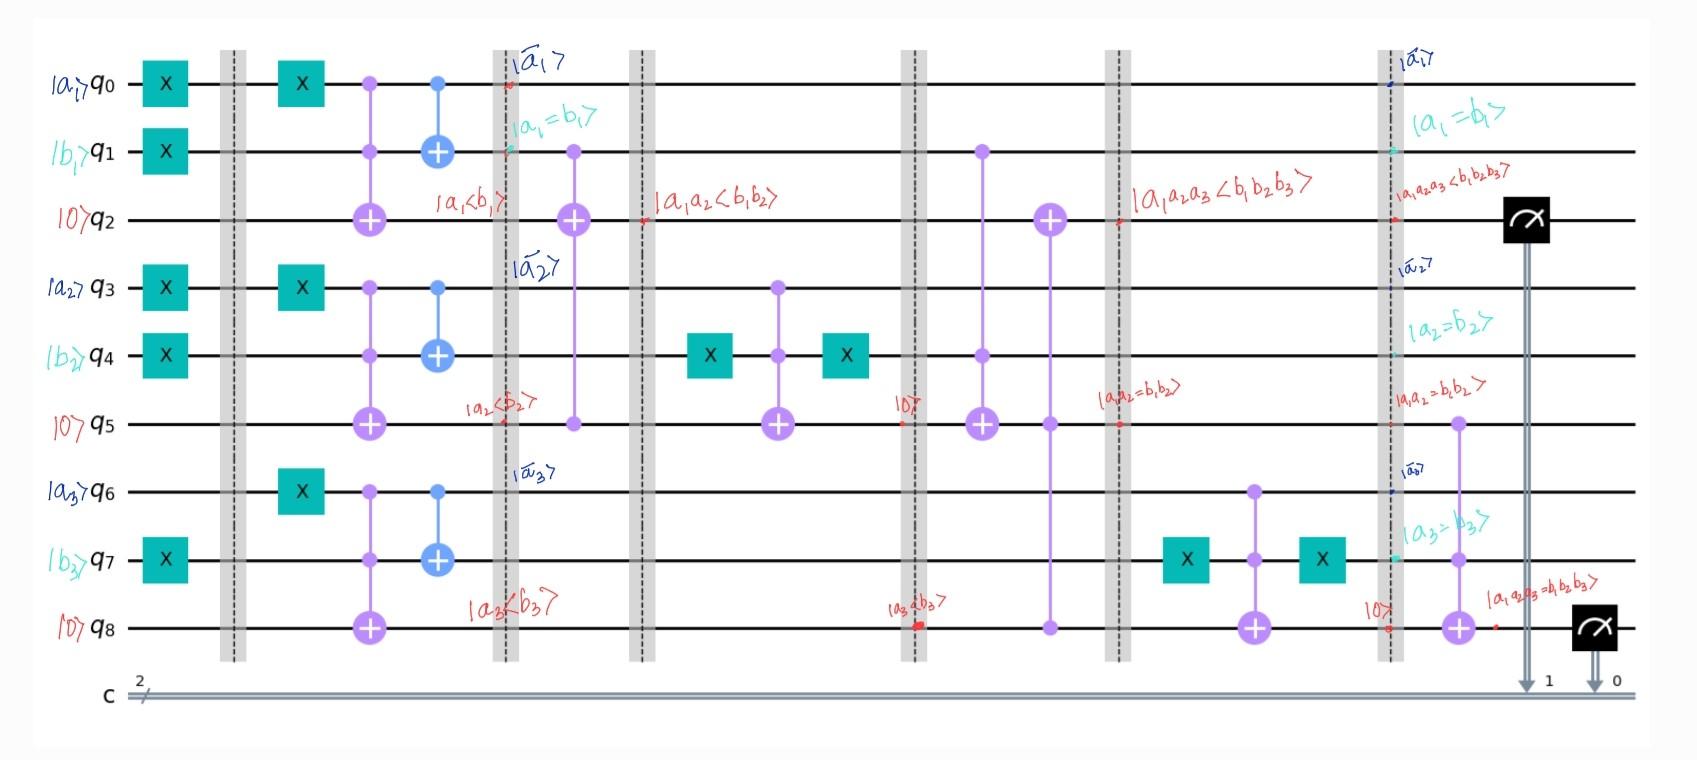

In [129]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer, transpile

# Convert Decimal to a Binary # Updated function to compare between two positive integers

def dec_2_bin(a):
    if a == 0:
        return [0,0]
    
    sign = 1 if a >= 0 else -1
    a = abs(a)
    bits = []
    
    while a > 0:
        bits.insert(0, a % 2)
        a //= 2
    
    if sign == -1:
        bits[0] = 1
    if len(bits) == 1:
        bits.insert(0,0)

    return bits


def find_the_largest_number(a,b):
    #Circuit Construction
    a_1 = dec_2_bin(a)
    b_1 = dec_2_bin(b)
    # prupose of while loop is to make sure the length of string a_1 and b_1 remain same
    while len(a_1) < len(b_1):
        a_1.insert(0,0)
    
    while len(a_1) > len(b_1):
        b_1.insert(0,0)

    n = len(a_1) # Length of the Binary digit
    
    # Initialize the Circuit
    qc = QuantumCircuit(3*n,2)
    # Encode Binary Strings into Quantum Circuit
    for i in range(n):
        if a_1[i] == 1:
            qc.x(3*i)
        if b_1[i] == 1:
            qc.x(3*i+1)

    qc.barrier()
    
    # Apply oracle_less_than
    for i in range(n):
        qc.x(3*i)
        qc.ccx(3*i,3*i+1,3*i+2)
        qc.cx(3*i,3*i+1)
    qc.barrier()
    
   # return(qc.draw(output='mpl'))

    qc.ccx(1,5,2)
    #second oracle on (3-5)  
    qc.barrier()
    qc.x(4)
    qc.ccx(3,4,5)
    qc.x(4)
    qc.barrier()
    #save 
    qc.ccx(1,4,5)

    for i in range(2,n):
        qc.ccx(3*i+2,3*i-1,2)
        qc.barrier()
        # Apply oracle_reset
        qc.x(3*i+1)
        qc.ccx(3*i,3*i+1,3*i+2)
        qc.x(3*i+1)
        qc.barrier()
        #save
        qc.ccx(3*i-1,3*i+1,3*i+2)

    qc.measure(2,1) # Oracle for a < b 
    qc.measure(-1,0) # Oracle for a == b 
    backend = Aer.get_backend('qasm_simulator')
    result = backend.run(qc, shots=1, memory=True).result()
    memory = result.get_memory(qc)
    
    #Convert memory string list into an integer list
    memory = [int(i) for i in memory[0]] 
   # print(memory)
    #return(qc.draw(output='mpl'))
    
    #conditional statement for positive integers
    if (memory[0] == 1):
        print( b,"is greater than ", a )
        return b
    elif (memory[0] == 0) and (memory[1] == 1):
        print( b,"is equal to ", a )
        return b 
    elif (memory[0] == 0) and (memory[1] == 0):
        print( a,"is greater than ", b )
        return a

#compare_1(6,7)[0].draw()
find_the_largest_number(6,7)#.draw(output='mpl')

7 is greater than  6


7

Part 2:  less_than_k function compares a integer 'a' against each element in a list lst of integers. For each element in the list, it checks if 'a' is greater than the element and appends it to a new list if it is. Finally, it returns a string representation of the new list containing elements less than 'a'

In [127]:
def less_than_k(a,lst): # a is integer value that is the positive number to compare in list_n
    new_lst = []        # lst is the integer list that has positive numbers.
    for elem in lst:
        if (find_the_largest_number(a,elem) == a) and (elem != a):
            
            new_lst.append(elem)
        else:
            pass
    return str(new_lst)
A = less_than_k(7,[4,7,1,11,14,7,13,6,15])
print(A)

7 is greater than  4
7 is equal to  7
7 is greater than  1
11 is greater than  7
14 is greater than  7
7 is equal to  7
13 is greater than  7
7 is greater than  6
15 is greater than  7
[4, 1, 6]


Updated Code for any Postive or Negative Integer( I have taken 16 bit circuit ) So total 50 qubits are required 

In [128]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer, transpile

# Convert Decimal to a Binary

def dec_2_bin(a): # a and b are the integers!
    a_bin = bin(abs(a))[2:]
    a_bin = [int(i) for i in a_bin] 
    zero = [0]
    while len(a_bin) < 16:
        a_bin.insert(0, 0)
    if a < 0:
        a_bin[0] = 1
    return a_bin


#print((dec_2_bin(8)))

def find_the_largest_number_1(a,b):
    #Circuit Construction
    n = len(dec_2_bin(a)) # Length of the Binary digit
    a_1 = dec_2_bin(a)
    b_1 = dec_2_bin(b)
    qc = QuantumCircuit(3*n+2,4)
    for i in range(n):
        if a_1[i] == 1:
            qc.x(3*i)
        if b_1[i] == 1:
            qc.x(3*i+1)
    #Copy Initial value of q[0] and q[2]
    qc.cx(0,-2)
    qc.cx(1,-1)
    qc.barrier()
    # Apply oracle_less_than
    for i in range(n):
        qc.x(3*i)
        qc.ccx(3*i,3*i+1,3*i+2)
        qc.cx(3*i,3*i+1)
    qc.barrier()
    qc.ccx(1,5,2)
    #second oracle on (3-5)  
    qc.barrier()
    qc.x(4)
    qc.ccx(3,4,5)
    qc.x(4)
    qc.barrier()
    #save 
    qc.ccx(1,4,5)

    for i in range(2,n):
        qc.ccx(3*i+2,3*i-1,2)
        qc.barrier()
        # Apply oracle_reset
        qc.x(3*i+1)
        qc.ccx(3*i,3*i+1,3*i+2)
        qc.x(3*i+1)
        qc.barrier()
        #save
        qc.ccx(3*i-1,3*i+1,3*i+2)
    # Measuring qc[0] and qc[1] if any of them is negative or both are negative

    qc.measure(-2,3)
    qc.measure(-1,2)
    qc.measure(2,1)
    qc.measure(-3,0)
    backend = Aer.get_backend('qasm_simulator')
    result = backend.run(qc, shots=1, memory=True).result()
    memory = result.get_memory(qc)
    #memory = memory[0].split(" ")
    #Convert memory string list into an integer list
    memory = [int(i) for i in memory[0]] 
   # return qc.draw(output='mpl')
    #conditional statement for positive or negative intergers
    if (memory[0] == 0) and (memory[1] == 1):
        print (a,"is greater than ", b)
        return a
    elif (memory[0] == 1) and (memory[1] == 0):
        print (b,"is greater than ", a)
        return b
    elif (memory[0] == 1) and (memory[1] == 1):
        if (memory[2] == 1):
            print( a,"is greater than ", b )
            return a
        elif (memory[2] == 0) and (memory[3] == 1):
            print( b,"is equal to ", a )
            return b 
        elif (memory[2] == 0) and (memory[3] == 0):
            print( b,"is greater than ", a )
            return b    
    
    else:
        if (memory[2] == 1):
            print( b,"is greater than ", a )
            return b
        elif (memory[2] == 0) and (memory[3] == 1):
            print( b,"is equal to ", a )
            return b 
        elif (memory[2] == 0) and (memory[3] == 0):
            print( a,"is greater than ", b )
            return a

#compare_1(6,7)[0].draw()
find_the_largest_number(0,1)#.draw(output='mpl')

1 is greater than  0


1